In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams.update({'font.size':10})
import fmEphys as fme

In [40]:
plasma_map = plt.cm.plasma(np.linspace(0,1,15))
colors = {
    'movement': plasma_map[12,:],
    'early': plasma_map[10,:],
    'late': plasma_map[8,:],
    'biphasic': plasma_map[5,:],
    'negative': plasma_map[2,:],
    'unresponsive': 'dimgrey',
    'gaze': 'firebrick',
    'comp': 'mediumblue',
    'rc': 'indigo'
}
psth_bins = np.arange(-1,1.001,1/1000)

In [8]:
%matplotlib inline

In [2]:
hffm = fme.read_group_h5('/home/niell_lab/Data/freely_moving_ephys/batch_files/hffm_012523_keyed_v2.h5')

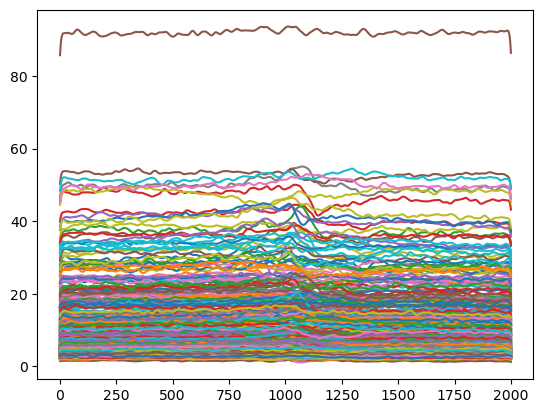

In [10]:
for i, ind in enumerate(hffm['pref_comp_psth_raw'][hffm['Fm_fr']>2].index.values):
    plt.plot(hffm.loc[ind,'pref_comp_psth_raw'])

In [11]:
def calc_PSTH_modind(psth, baseval='range'):
    # modulation in terms of spike rate
    psth = psth.astype(float)
    if baseval=='range':
        use = psth - np.mean(psth[0:800].copy())
    elif baseval=='zero':
        use = psth - psth[1000]
    elif baseval=='tight':
        use = psth - np.mean(psth[750:975].copy())
    mod = np.max(np.abs(use[1000:1250]))
    return mod

In [12]:
for ind, row in hffm.iterrows():
    sec = row['FmLt_eyeT'][-1].astype(float) - row['FmLt_eyeT'][0].astype(float)
    sp = len(row['FmLt_spikeT'])
    hffm.at[ind, 'FmLt_fr'] = sp/sec

    hffm.at[ind, 'raw_mod_for_comp'] = calc_PSTH_modind(row['pref_comp_psth_raw'])

    hffm.at[ind, 'norm_mod_for_comp'] = calc_PSTH_modind(row['pref_comp_psth'])
    
hffm['comp_responsive'] = False
for ind, row in hffm.iterrows():
    if (row['raw_mod_for_comp']>1) and (row['norm_mod_for_comp']>0.1):
        hffm.at[ind, 'comp_responsive'] = True
print(hffm['comp_responsive'].sum(), '/', len(hffm.index))

48 / 716


In [13]:
48/716

0.0670391061452514

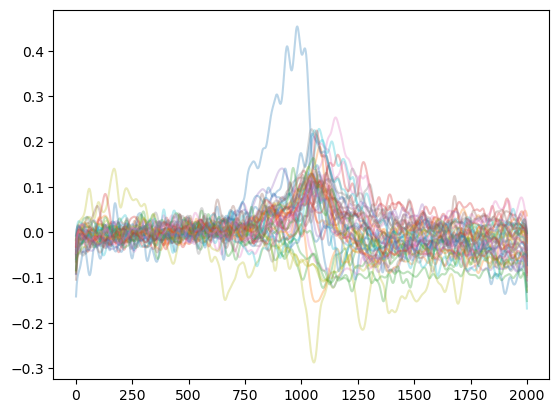

In [17]:
for i, ind in enumerate(hffm[['pref_comp_psth_raw','pref_comp_psth']][hffm['comp_responsive']].index.values):
    plt.plot(hffm.loc[ind,'pref_comp_psth'], alpha=0.3)

In [153]:
hffm['comp_responsive'].sum()

48

In [3]:
4+5+17+15+7

48

In [27]:
hffm['gazecluster'][hffm['comp_responsive']].value_counts()

biphasic        17
negative        15
unresponsive     7
late             5
early            4
Name: gazecluster, dtype: int64

In [28]:
hffm['gazecluster'].value_counts()

unresponsive    263
biphasic        170
late            135
early            82
negative         66
Name: gazecluster, dtype: int64

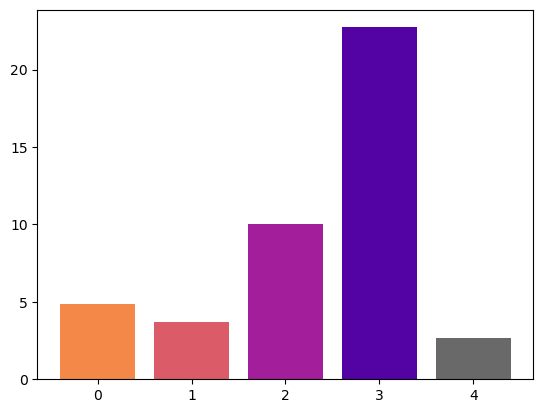

In [26]:
vals = hffm['gazecluster'][hffm['comp_responsive']].value_counts() / hffm['gazecluster'].value_counts()
for n, name in enumerate(['early','late','biphasic','negative','unresponsive']):
    plt.bar(n, vals[name]*100, color=colors[name])

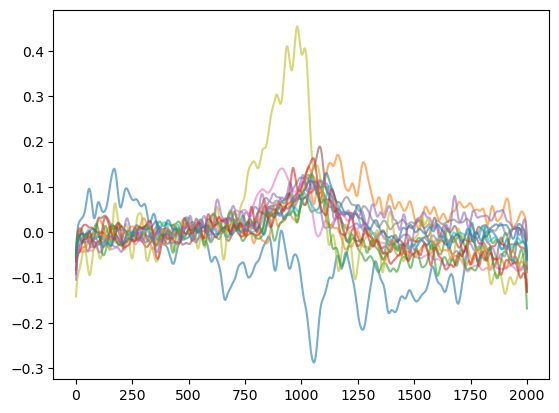

In [30]:
for i, ind in enumerate(hffm[['pref_comp_psth_raw','pref_comp_psth']][hffm['gazecluster']=='negative'][hffm['comp_responsive']].index.values):
    plt.plot(hffm.loc[ind,'pref_comp_psth'], alpha=0.6)

In [53]:
psth

(691,
 array([-0.03793757873932144, -0.0340884201549879, -0.031020254743540854,
        ..., -0.0576832981032064, -0.062002299360961, -0.0668989394009203],
       dtype=object))

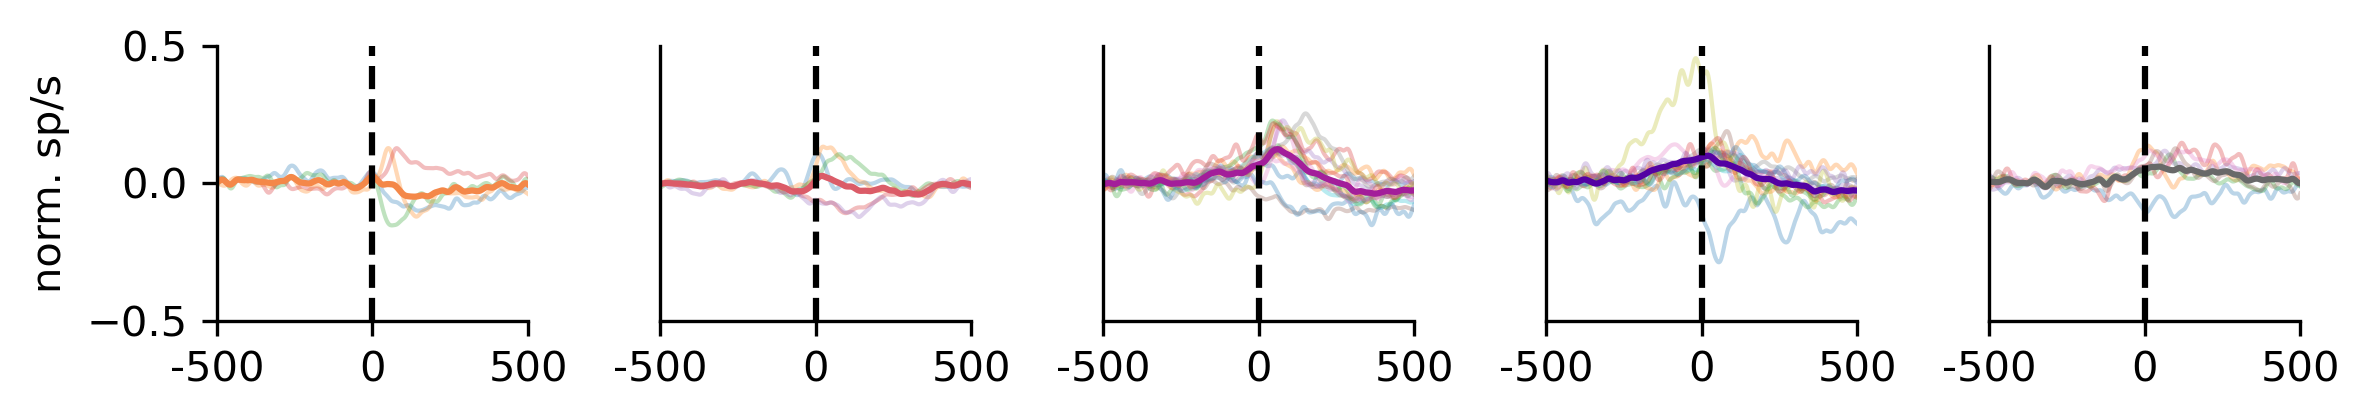

In [115]:
fig, axs = plt.subplots(1,5, figsize=(8,1.5), dpi=300)

for n, name in enumerate(['early','late','biphasic','negative','unresponsive']):
    _use_data = hffm['pref_comp_psth'][hffm['gazecluster']==name][hffm['comp_responsive']]
    for i, psth in _use_data.iteritems():
        axs[n].plot(psth_bins, psth, linewidth=1, alpha=0.3)
    _cluster_mean = np.mean(fme.flatten_series(_use_data),0)
    axs[n].plot(psth_bins, _cluster_mean, color=colors[name])
    axs[n].set_xlim([-.500,.500])
    axs[n].set_ylim([-0.5,0.5])
    axs[n].vlines(0, -0.5, 0.5, color='k', linestyle='dashed')
    axs[n].set_yticks([-0.5,0,0.5], label=[-500,0,500])
    # if n == 0:
    #     axs[n].set_y
    if n > 0:
        axs[n].set_yticks([], label=[])
    axs[n].set_xticks([-.5,0,.5], labels=[-500,0,500])
axs[0].set_ylabel('norm. sp/s')
# for i, ind in enumerate(.index.values):
#     plt.plot(hffm.loc[ind,'pref_comp_psth'], alpha=0.6)

fig.tight_layout()
fig.savefig('/home/niell_lab/cluster_psth_groups.pdf')

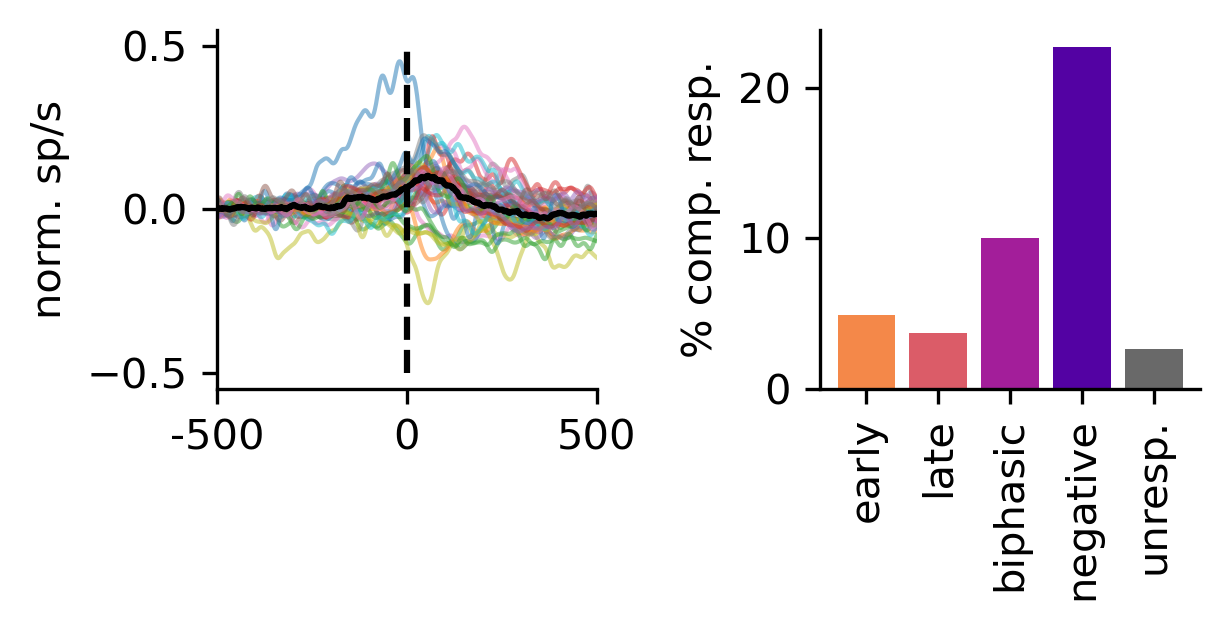

In [124]:
fig, [ax0,ax1] = plt.subplots(1,2, figsize=(4.2,2.2), dpi=300)

for i, ind in enumerate(hffm[['pref_comp_psth_raw','pref_comp_psth']][hffm['comp_responsive']].index.values):
    ax0.plot(psth_bins, hffm.loc[ind,'pref_comp_psth'], linewidth=1, alpha=0.5)
_arr = fme.flatten_series(hffm['pref_comp_psth'][hffm['comp_responsive']])
ax0.plot(psth_bins, np.median(_arr, 0), color='k')
ax0.set_xlim([-.500,.500])
# ax0.set_ylim([-0.5,0.5])
ax0.vlines(0, -0.5, 0.5, color='k', linestyle='dashed')
ax0.set_xticks([-0.5,0,0.5], labels=[-500,0,500])
ax0.set_ylabel('norm. sp/s')

vals = hffm['gazecluster'][hffm['comp_responsive']].value_counts() / hffm['gazecluster'].value_counts()
for n, name in enumerate(['early','late','biphasic','negative','unresponsive']):
    ax1.bar(n, vals[name]*100, color=colors[name])
ax1.set_xticks(range(5), labels=['early','late','biphasic','negative','unresp.'], rotation=90)
ax1.set_ylabel('% comp. resp.')
    
fig.tight_layout()
fig.savefig('/home/niell_lab/Desktop/comp_responses.pdf')

In [127]:
use_data = hffm['FmLt_gazeshift_peakT'][hffm['gazecluster']!='unresponsive'][hffm['FmLt_gazeshift_peakT']<.2].copy()

In [128]:
use_data

536    0.111
537    0.107
538    0.127
541    0.128
543    0.162
       ...  
527    0.104
529    0.130
530    0.108
532    0.142
534    0.122
Name: FmLt_gazeshift_peakT, Length: 421, dtype: float64

In [129]:
row = hffm[hffm['session']=='070921_J553RT_control_Rig2'].iloc[0].copy()

In [130]:
def interp_nans(y):
    nans = np.isnan(y)
    x = lambda z: z.nonzero()[0]
    
    y[nans] = np.interp(x(nans), x(~nans), y[~nans])
    
    return y

In [131]:
# comp saccade times
saccTcomp = []
saccTcomp.extend(row['FmLt_comp_left_saccTimes_dHead1'].copy())
saccTcomp.extend(row['FmLt_comp_right_saccTimes_dHead1'].copy())

In [132]:
# gaze saccade times
saccT = []
saccT.extend(row['FmLt_gazeshift_left_saccTimes_dHead1'].copy())
saccT.extend(row['FmLt_gazeshift_right_saccTimes_dHead1'].copy())

eyeT = interp_nans(row['FmLt_eyeT'].copy())
dEye = row['FmLt_dEye_dps'].copy()
dHead = row['FmLt_dHead'].copy()
dGaze = row['FmLt_dGaze'].copy()
spikeT = row['FmLt_spikeT'].copy()

# spike binning
# dT = 1/60
# modelT = np.arange(0, np.nanmax(eyeT), dT)
# bins = np.append(modelT, modelT[-1]+dT)
binned_rate, _ = np.histogram(spikeT, eyeT)
# binned_rate = binned_rate / dT

In [133]:
compspeeds_arr = np.zeros([len(saccTcomp), 4, 21])
    # spike rate, dEye speed, dGaze speed

for i, t in enumerate(saccTcomp):
    saccInd = np.nanargmin(np.abs(eyeT-t))
    indRange = np.arange(saccInd-10, saccInd+11)
    # win_eye_speed = dEye[saccInd-3:saccInd+3].copy()
    # saccSpeed = np.abs(np.nanmax(win_eye_speed) - np.nanmin(win_eye_speed))
    
    compspeeds_arr[i,0,:] = binned_rate[indRange]
    
    compspeeds_arr[i,1,:] = dEye[indRange]
    
    compspeeds_arr[i,2,:] = dHead[indRange]
    
    compspeeds_arr[i,3,:] = dGaze[indRange]
    

In [134]:
speeds_arr = np.zeros([len(saccT), 4, 21])
    # spike rate, dEye speed, dGaze speed

for i, t in enumerate(saccT):
    saccInd = np.nanargmin(np.abs(eyeT-t))
    indRange = np.arange(saccInd-10, saccInd+11)
    # win_eye_speed = dEye[saccInd-3:saccInd+3].copy()
    # saccSpeed = np.abs(np.nanmax(win_eye_speed) - np.nanmin(win_eye_speed))
    
    speeds_arr[i,0,:] = binned_rate[indRange]
    
    speeds_arr[i,1,:] = dEye[indRange]
    
    speeds_arr[i,2,:] = dHead[indRange]
    
    speeds_arr[i,3,:] = dGaze[indRange]
    

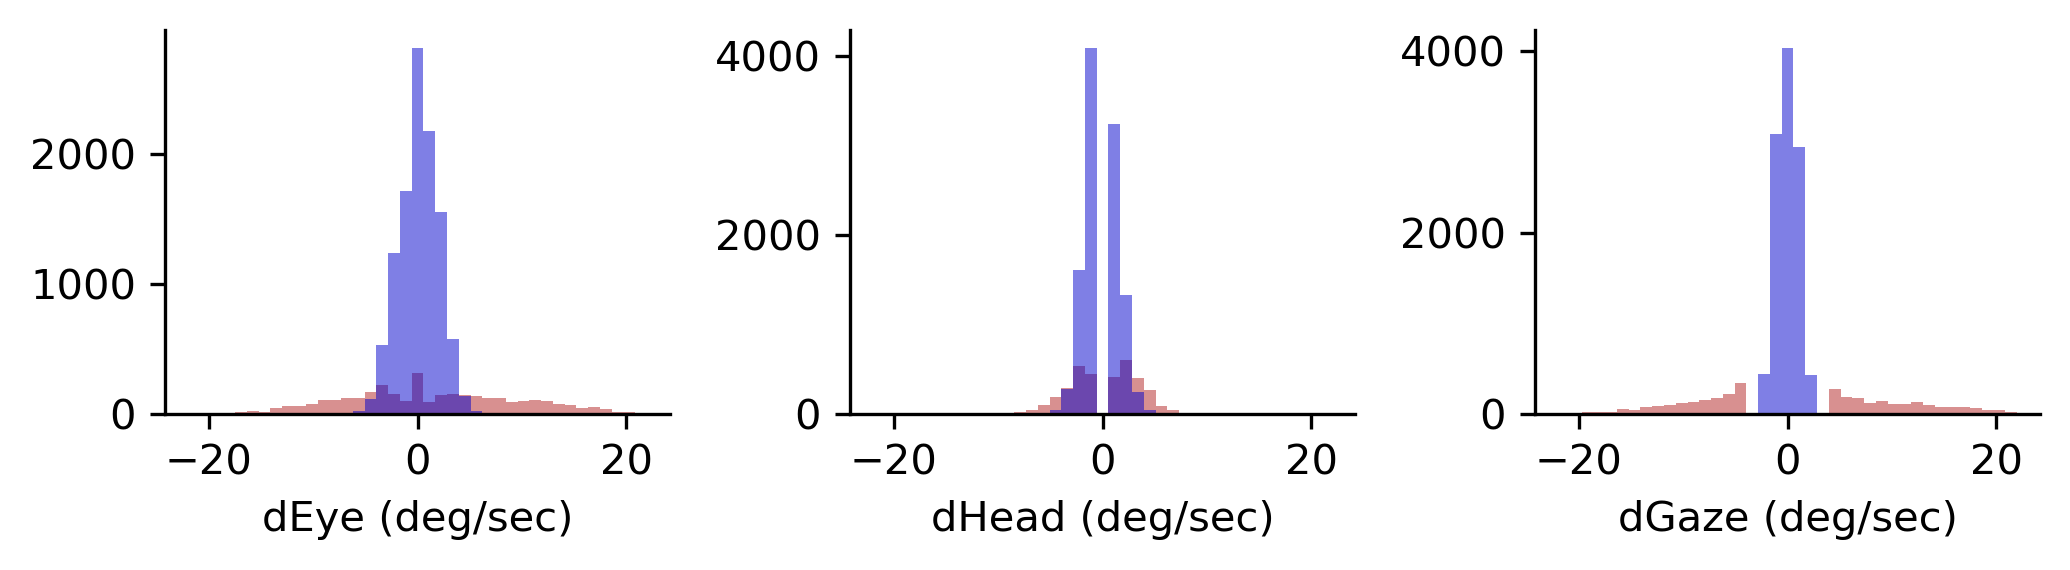

In [152]:
fig, [ax0,ax1,ax2] = plt.subplots(1,3,figsize=(7,2), dpi=300)

_usebins = np.linspace(-22,22,40)

ax0.hist(speeds_arr[:,1,10]*(1/60), alpha=0.5, color=colors['gaze'], density=True, bins=_usebins, linewidth=2)
ax0.hist(compspeeds_arr[:,1,10]*(1/60), alpha=0.5, color=colors['comp'], density=True, bins=_usebins, linewidth=2)

ax1.hist(speeds_arr[:,2,10]*(1/60), alpha=0.5, color=colors['gaze'], density=True, bins=_usebins, linewidth=2)
ax1.hist(compspeeds_arr[:,2,10]*(1/60), alpha=0.5, color=colors['comp'], density=True, bins=_usebins, linewidth=2)

ax2.hist(speeds_arr[:,3,10]*(1/60), alpha=0.5, color=colors['gaze'], density=True, bins=_usebins, linewidth=2)
ax2.hist(compspeeds_arr[:,3,10]*(1/60), alpha=0.5, color=colors['comp'], density=True, bins=_usebins, linewidth=2)

# ax0.set_xlim([-1500,1500])
# ax2.set_xlim([-1500,1500])
# ax1.set_xlim([-1500,1500])

ax0.set_xlabel('dEye (deg/sec)')
ax1.set_xlabel('dHead (deg/sec)')
ax2.set_xlabel('dGaze (deg/sec)')

# ax0.set_yticklabels(['{:,.2%}'.format(x) for x in ax0.get_yticks()])
# ax1.set_yticklabels(['{:,.2%}'.format(x) for x in ax1.get_yticks()])
# ax2.set_yticklabels(['{:,.2%}'.format(x) for x in ax2.get_yticks()])

fig.tight_layout()

fig.savefig('/home/niell_lab/Desktop/eye_velocity_comp_vs_gaze-v2.pdf')